# CLEANING A DATASET EXAMPLE

In this Jupyter notebook I will demonstrate my cleaning process / thoughts with a large, 
messy dataset I found on http://insideairbnb.com/get-the-data.html. I chose a random csv file
for San Diego, CA because it's a beautiful city.

### Importing packages and taking a look at the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None
df = pd.read_csv('airbnb_sd.csv')
df.sample(5)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,nightly_price,price_per_stay,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_stays,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
12011,35229696,https://www.airbnb.com/rooms/35229696,Luxurious Beach Vacation Home,This home was built with details in mind . The...,We are 2 blocks from the beach and next door t...,This home was built with details in mind . The...,We are 2 blocks from the beach and next door t...,NaN,"There is plenty within walking distance, an ea...",NaN,"Your onsite host, Scott will be available duri...",NaN,NaN,67253416,https://www.airbnb.com/users/show/67253416,Tracy,4/14/16,"San Diego, California, United States",I'm an integrative wellness provider. I love ...,within an hour,100%,NaN,f,Point Loma Heights,6.0,6.0,t,f,"San Diego, CA, United States",Ocean Beach,Ocean Beach,San Diego,CA,92107,San Diego,"San Diego, CA",US,United States,32.74560,-117.24743,t,House,Entire home/apt,9,2.0,3.0,4.0,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",He...",NaN,$265.00,$795.00,$300.00,$175.00,1,$0.00,3,1125,4,8,6/14/19,7/28/19,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,strict_14_with_grace_period,f,f
4594,36602920,https://www.airbnb.com/rooms/36602920,Chula Vista's Best,NEW CONSTRUCTION! Bahia Vista II offers the be...,NaN,NEW CONSTRUCTION! Bahia Vista II offers the be...,NaN,NaN,Very close to the train station (less than 5 m...,NaN,NaN,NaN,NaN,73252582,https://www.airbnb.com/users/show/73252582,Shanice-Raynell,5/21/16,"Chicago, Illinois, United States",NaN,within an hour,100%,NaN,f,NaN,1.0,1.0,t,f,"Chula Vista, CA, United States",NaN,Southwest,Chula Vista,CA,91911,San Diego,"Chula Vista, CA",US,United States,32.60217,-117.08868,t,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Heating,Washe...",NaN,$34.00,$34.00,$0.00,$40.00,1,$25.00,1,60,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,flexible,f,f
3788,29902028,https://www.airbnb.com/rooms/29902028,Chic Shoreline Shanty Steps from Sand in Your ...,This welcoming shoreline shanty ideally locate...,You will have a comfortably studio with break...,This welcoming shoreline shanty ideally locate...,The Bungalow is located in the heart of Missio...,NaN,"Getting around San Diego, CA (MYF-Montgomery F...",You will have use if the entire house. Have e...,I look forward to hosting your stay and want t...,NaN,NaN,3962284,https://www.airbnb.com/users/show/3962284,Adam,10/24/12,"San Diego, California, United States","Like to travel, eat, enjoy a fine scotch and a...",within an hour,96%,NaN,f,Mission Beach,3.0,3.0,t,t,"San Diego, CA, United States",Mission Beach,Mission Bay,San Diego,CA,92109,San Diego,"San Diego, CA",US,United States,32.78280,-117.25287,t,Guesthouse,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",H...",NaN,$75.00,$75.00,$500.00,$65.00,1,$0.00,1,1125,23,46,11/26/18,8/11/19,91.0,9.0,9.0,10.0,9.0,10.0,9.0,f,t,f,strict_14_with_grace_period,f,f
6177,19102827,https://www.airbnb.com/rooms/19102827,San Diego King Studio at Inn at the Park Resort,This large

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13051 entries, 0 to 13050
Data columns (total 75 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13051 non-null  int64  
 1   listing_url                       13051 non-null  object 
 2   name                              13051 non-null  object 
 3   summary                           12635 non-null  object 
 4   space                             10080 non-null  object 
 5   description                       12836 non-null  object 
 6   neighborhood_overview             9138 non-null   object 
 7   notes                             7103 non-null   object 
 8   transit                           8261 non-null   object 
 9   access                            8224 non-null   object 
 10  interaction                       8666 non-null   object 
 11  house_rules                       9587 non-null   object 
 12  thum

Wow, 3 immediate thoughts: 
1. There's a lot of columns here
2. There's lot of data types that don't match up well with their respective column
3. There's a lot of missing data

I'm going to start with dropping some columns I don't think will be particularily useful/redundant, or columns have too much missing data

In [ ]:
# drop not needed columns
to_drop = ['listing_url','name','notes','host_about','house_rules','bed_type','space','extra_people','neighborhood_overview',
           'transit','square_feet','amenities','access','interaction','thumbnail_url','host_url','host_name','host_location',
           'host_listings_count','host_acceptance_rate','street','neighbourhood_cleansed','city', 'state', 'zipcode', 'market',
           'smart_location', "country_code",'country','latitude','longitude','is_location_exact','price_per_stay',]
df = df.drop(to_drop, axis=1)

In [5]:
# set index to unique column
df.set_index('id')

,summary,description,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,nightly_price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,number_of_stays,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
33159143,80% of the house + yourCozy room ... in Scripp...,80% of the house + yourCozy room ... in Scripp...,249661563,3/18/19,within a few hours,100%,f,Scripps Ranch,1.0,t,f,Scripps Ranch,House,Private room,1,1.0,1.0,1.0,"$1,100.00","$1,000.00",$0.00,1,60,90,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,t,f,strict_14_with_grace_period,f,f
17138468,AVAILABLE ONLY IN WINTER PRIME La Jolla Villag...,AVAILABLE ONLY IN WINTER PRIME La Jolla Villag...,79755951,6/24/16,NaN,NaN,f,La Jolla,1.0,t,f,La Jolla,Apartment,Entire home/apt,1,2.0,2.0,3.0,"$1,400.00",NaN,NaN,1,30,1125,2,4,4/22/17,8/31/17,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,strict_14_with_grace_period,f,f
21898446,Hi! We are basically renting this master for a...,Hi! We are basically renting this master for a...,159773487,11/22/17,NaN,NaN,f,Pacific Beach,1.0,t,f,Pacific Beach,Townhouse,Private room,1,1.0,1.0,1.0,"$1,250.00",NaN,NaN,1,30,30,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,t,f,flexible,f,f
25948680,"All my stuff will be gone. Dishwasher, washer/...","All my stuff will be gone. Dishwasher, washer/...",185758729,4/22/18,NaN,NaN,f,College East,1.0,t,f,College East,Apartment,Entire home/apt,1,1.0,1.0,1.0,"$1,150.00",NaN,NaN,1,31,40,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,flexible,f,f
1756516,"NIcely furnished. Great location, 2 blocks to ...","NIcely furnished. Great location, 2 blocks to ...",3634860,9/21/12,within a day,67%,f,La Jolla,6.0,t,t,La Jolla,Condominium,Private room,1,1.0,1.0,1.0,$110.00,$200.00,NaN,1,180,365,2,4,2/22/15,9/23/18,90.0,7.0,7.0,8.0,8.0,9.0,10.0,f,f,f,strict_14_with_grace_period,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20473217,Classic 2-villa estate near Crystal Pier,Classic 2-villa estate near Crystal Pier,38690778,7/16/15,within an hour,95%,t,La Jolla,86.0,t,t,Mission Beach,Villa,Entire home/apt,20,7.0,8.0,11.0,"$3,000.00","$3,000.00",NaN,20,1,1125,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,f,luxury_moderate,f,f
17975465,Offering panoramic views of the gorgeous Pacif...,Offering panoramic views of the gorgeous Pacif...,122055416,3/22/17,within an hour,99%,f,Pacific Beach,403.0,t,f,La Jolla,House,Entire home/apt,20,7.0,10.0,13.0,"$2,823.00","$1,000.00",$874.00,20,1,1125,6,12,10/8/17,6/11/19,83.0,8.0,8.0,9.0,9.0,10.0,8.0,f,t,f,super_strict_60,f,f
4227110,"""Pacific Beach Mermaid"" PRIMO LOCATION! Two b...","""Pacific Beach Mermaid"" PRIMO LOCATION! Two b...",2503251,5/30/12,within an hour,96%,f,Pacific Beach,11.0,t,t,Pacific Beach,House,Entire home/apt,20,2.0,4.0,10.0,$208.00,"$1,000.00",$332.00,4,1,1125,142,284,12/29/14,8/11/19,92.0,9.0,9.0,9.0,9.0,10.0,8.0,f,t,f,strict_14_with_grace_period,f,f


### Fixing Boolean Columns
Now I am going to fix the boolean columns. This data seems pretty uniform using a 'f' for false and 't' for true. But we also need to account for missing data as I don't want to just drop the whole column or rows for some missing points. So I make a dictionary of the changes I want to implement and assign the missing values as pandas missing values as they work MUCH better in future calculations

In [6]:
# fix boolean columns
replace = {'f': False, 't': True, 'NaN':pd.NA}
df = df.replace(replace)

In [7]:
df = df.convert_dtypes()

In [8]:
df.dtypes

id                                    Int64
summary                              string
description                          string
host_id                               Int64
host_since                           string
host_response_time                   string
host_response_rate                   string
host_is_superhost                   boolean
host_neighbourhood                   string
host_total_listings_count             Int64
host_has_profile_pic                boolean
host_identity_verified              boolean
neighbourhood                        string
property_type                        string
room_type                            string
accommodates                          Int64
bathrooms                           float64
bedrooms                              Int64
beds                                  Int64
nightly_price                        string
security_deposit                     string
cleaning_fee                         string
guests_included                 

I am checking the data types and see boolean types where I want them, excellent. I can check the different values in each boolean column if wanted, but they'd show up as an 'object' (similar to string) data type if not a valid boolean column.

In [75]:
# checking a boolean column
df['instant_bookable'].value_counts()

True     5754
False    5152
Name: instant_bookable, dtype: Int64

### Fixing Date Columns
Now I have 3 columns that clearly specify a date, but are a string data type. They all follow the same format of MM-DD-YY so making a new column for them (while skipping rows with missing values) is easy. I then take a look that their data type is correct and drop the old columns.

In [9]:
df['date_host_since'] = pd.to_datetime(df['host_since'], format='%m/%d/%y', errors='coerce')
df['date_first_review'] = pd.to_datetime(df['first_review'], format='%m/%d/%y', errors='coerce')
df['date_last_review'] = pd.to_datetime(df['last_review'], format='%m/%d/%y', errors='coerce')

In [11]:
print(df['date_host_since'].dtypes)
print(df['date_first_review'].dtypes)
print(df['date_last_review'].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]


In [12]:
# drop our old "date" columns
to_drop = ['host_since','first_review','last_review']
df = df.drop(to_drop, axis=1)

In [13]:
df['host_response_time'].unique()

<StringArray>
['within a few hours',                 <NA>,       'within a day',
 'a few days or more',     'within an hour']
Length: 5, dtype: string

In [14]:
df['host_neighbourhood'].value_counts()

Pacific Beach     1374
Mission Beach      913
La Jolla           700
East Village       685
North Park         558
                  ... 
Watertown            1
Centro               1
Mission Valley       1
Silom                1
Riverdale            1
Name: host_neighbourhood, Length: 211, dtype: Int64

### Cleaning currency columns into Integer/float data types
There are multiple rows that signify currency that are string data types, but I want them as  float or integer to be able to perform calculations on. So I need to remove the dollar signs and any commas inside them and then change their data type to numeric. There is also 1 column that is a percentage, so same steps just removing the percent sign instead of dollar sign.

In [15]:
# clean currency into integers
df['nightly_price'] = df['nightly_price'].str.replace(',','')
df['nightly_price'] = df['nightly_price'].str.replace('$','')
df['nightly_price'] = pd.to_numeric(df['nightly_price'], errors='coerce')
df['security_deposit'] = df['security_deposit'].str.replace(',','')
df['security_deposit'] = df['security_deposit'].str.replace('$','')
df['security_deposit'] = pd.to_numeric(df['security_deposit'], errors='coerce')
df['cleaning_fee'] = df['cleaning_fee'].str.replace(',','')
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$','')
df['cleaning_fee'] = pd.to_numeric(df['cleaning_fee'], errors='coerce')

In [16]:
# fix host rate from string to numeric
df['host_response_rate'] = df['host_response_rate'].str.replace('%','')
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce')

In [76]:
# check the column's data type
print(df['nightly_price'].dtypes)
print(df['security_deposit'].dtypes)
print(df['cleaning_fee'].dtypes)
print(df['host_response_rate'].dtypes)

float64
float64
float64
float64


Looking over the data I had a thought that listings without any ratings really don't do us a lot of good, and probably make up most of the rows of missing data, so let's just get rid of them and see what it looks like.

In [18]:
# drop rows w/o a rating
df = df.dropna(subset=['review_scores_rating'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10906 entries, 1 to 13050
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                10906 non-null  Int64         
 1   summary                           10629 non-null  string        
 2   description                       10798 non-null  string        
 3   host_id                           10906 non-null  Int64         
 4   host_response_time                9576 non-null   string        
 5   host_response_rate                9576 non-null   float64       
 6   host_is_superhost                 10905 non-null  boolean       
 7   host_neighbourhood                9373 non-null   string        
 8   host_total_listings_count         10905 non-null  Int64         
 9   host_has_profile_pic              10905 non-null  boolean       
 10  host_identity_verified            10905 non-nu

Yup, we are now down to 10906 rows and a lot of our columns aren't missing any/ hardly any data points now. A few more columns that don't seem very useful also seem to be the "summary" and "description" columns as I was considering possibly making them boolean columns on if the host had or did not have them. But it seemed most reviewless listings had no summar/description, so we can drop those columns too.

In [20]:
# took care of most listing w/o summary or description
# was thinking of making them boolean columns, now will remove
to_drop = ['summary','description']
df = df.drop(to_drop, axis=1)

### Creating Categorical Columns
We have some string columns left that I think could be useful to compare between each other, but I'm going to take a look to make sure they would fit well as categories and don't have slight differences that need cleaning up (like "room_type" having a 'entire home' and also 'whole home' categorgy, because that would really be the same thing. I then convert them to the 'category' data type as it actually saves memory if you check the "memory usage" at the bottom of any df.info() call. Not super important for this data set, but when they get huge it can be.

In [94]:
# check categorical columns
print(df['cancellation_policy'].value_counts())
print()
print(df['room_type'].value_counts())
print()
print(df['property_type'].value_counts())
print()
print(df['host_response_time'].value_counts())

strict_14_with_grace_period    5081
moderate                       3154
flexible                       2045
super_strict_60                 441
super_strict_30                 125
strict                           60
Name: cancellation_policy, dtype: int64

Entire home/apt    8020
Private room       2763
Shared room         123
Name: room_type, dtype: int64

House                     3848
Apartment                 2853
Condominium               1518
Townhouse                  608
Guesthouse                 455
Guest suite                440
Bungalow                   277
Cottage                    273
Loft                       229
Villa                       70
Hostel                      64
Serviced apartment          49
Camper/RV                   39
Other                       33
Boat                        27
Tiny house                  27
Bed and breakfast           20
Boutique hotel              17
Resort                      10
Hotel                       10
Aparthotel          

The "property_type" column maybe could get condensed a little but overall the columns seem good.

In [41]:
# set categorical data type to save memory
df['cancellation_policy'] = pd.Categorical(df['cancellation_policy'])
df['room_type'] = pd.Categorical(df['room_type'])
df['property_type'] = pd.Categorical(df['property_type'])
df['host_response_time'] = pd.Categorical(df['host_response_time'])
df['host_neighborhood'] = pd.Categorical(df['host_neighborhood'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10906 entries, 1 to 13050
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                10906 non-null  Int64         
 1   host_id                           10906 non-null  Int64         
 2   host_response_time                9576 non-null   category      
 3   host_response_rate                9576 non-null   float64       
 4   host_is_superhost                 10905 non-null  boolean       
 5   host_neighbourhood                9373 non-null   string        
 6   host_total_listings_count         10905 non-null  Int64         
 7   host_has_profile_pic              10905 non-null  boolean       
 8   host_identity_verified            10905 non-null  boolean       
 9   neighbourhood                     10562 non-null  string        
 10  property_type                     10906 non-nu

### Now let's take a look at the numeric data, make sure they make sense
Things seem like they look pretty good! Some Richie Rich has 1737 listings stands out to me, but mean/median values look good everywhere.

In [39]:
# take a look
pd.set_option('display.precision',2)  #otherwise everything goes 6 decimal points
df.describe()

,id,host_id,host_response_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,nightly_price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,number_of_stays,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,1.09e+04,1.09e+04,9576.00,10905.00,10906.00,10905.00,10903.00,10903.00,10906.00,9073.0,10082.00,10906.00,10906.00,10906.0,10906.00,10906.00,10906.00,10902.00,10904.00,10893.00,10902.00,10892.00,10890.0
mean,2.06e+07,7.19e+07,97.46,37.41,4.48,1.48,1.63,2.39,201.43,317.9,103.91,2.39,3.87,612.4,41.72,83.43,95.30,9.71,9.59,9.83,9.82,9.79,9.5
std,1.02e+07,7.19e+07,9.33,150.40,2.98,0.86,1.17,1.88,249.60,472.2,100.22,2.32,12.47,1399.5,63.45,126.89,6.99,0.71,0.79,0.57,0.59,0.56,0.8
min,6.00e+00,2.90e+01,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,1.00,1.0,1.00,2.00,20.00,2.00,2.00,2.00,2.00,2.00,2.0
25%,1.33e+07,1.26e+07,100.00,1.00,2.00,1.00,1.00,1.00,80.00,0.0,37.00,1.00,1.00,29.0,5.00,10.00,94.00,10.00,9.00,10.00,10.00,10.00,9.0
50%,2.12e+07,4.39e+07,100.00,2.00,4.00,1.00,1.00,2.00,134.00,200.0,75.00,1.00,2.00,365.0,16.00,32.00,97.00,10.00,10.00,10.00,10.00,10.00,10.0
75%,2.90e+07,1.14e+08,100.00,9.00,6.00,2.00,2.00,3.00,235.00,500.0,145.00,3.00,3.00,1125.0,52.00,104.00,100.00,10.00,10.00,10.00,10.00,10.00,10.0
max,3.77e+07,2.84e+08,100.00,1737.00,24.00,27.50,10.00,22.00,10000.00,5000.0,1025.00,24.00,800.00,99999.0,786.00,1572.00,100.00,10.00,10.00,10.00,10.00,10.00,10.0


# Some Visualizations
Our data looks pretty good now. I could definitely cut out more columns if I had a specific direction I was taking with the data set, but for now I just wanted to 'trim the fat' and fix up the columns. Now I can do endless examinations of the data. Let's just take a look at the dustibution of the nightly prices for our data.

(array([3923., 3634., 1493.,  717.,  393.,  251.,  142.,   83.,   56.,
          86.,   42.,   20.,   13.,    7.,   12.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000., 1100., 1200., 1300., 1400., 1500.]),
 <BarContainer object of 15 artists>)

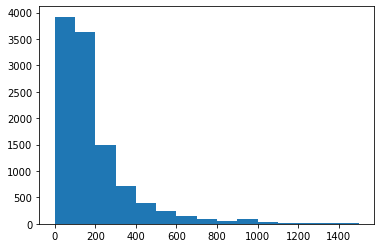

In [36]:
plt.hist(x=df['nightly_price'], range=(0,1500), bins=15)

Cool! But what if I want to find a place with a couple friends? We want at least 1.5 bathrooms and between 2-3 bedrooms. So I'll take a subset form our DataFrame and make a new one to look at with those specifications.

In [97]:
df1 = df.loc[(df['bathrooms']>=1.5) & (df['bedrooms'] <= 3) & (df['bedrooms'] >= 2)]

In [98]:
df1.head()

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,nightly_price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,number_of_stays,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,date_host_since,date_first_review,date_last_review
1,17138468,79755951,NaN,NaN,False,La Jolla,1,True,False,La Jolla,Apartment,Entire home/apt,1,2.0,2,3,1400.0,NaN,NaN,1,30,1125,2,4,100,10,10,10,10,10,10,False,True,False,strict_14_with_grace_period,False,False,2016-06-24,2017-04-22,2017-08-31
665,27490250,56093247,within a day,50.0,False,<NA>,1,True,True,Carmel Mountain,House,Private room,1,2.0,3,1,39.0,NaN,15.0,1,1,1125,1,2,100,10,10,10,10,10,10,False,False,False,flexible,False,False,2016-01-25,2018-09-02,2018-09-02
759,4942366,426416,within an hour,100.0,True,North Park,2,True,True,North Park,Apartment,Entire home/apt,2,2.0,2,2,327.0,1000.0,85.0,1,30,1125,8,16,100,10,10,10,10,10,10,False,False,False,strict_14_with_grace_period,False,True,2011-03-06,2015-09-01,2018-12-31
978,8357014,13782250,NaN,NaN,False,Cortez,1,True,True,Core-Columbia,Condominium,Entire home/apt,2,2.0,2,2,269.0,0.0,80.0,2,6,1125,48,96,93,10,10,10,10,9,9,False,False,False,strict_14_with_grace_period,False,False,2014-04-01,2015-11-04,2019-01-29
1025,17745903,115833110,NaN,NaN,False,<NA>,1,True,True,Hillcrest,Loft,Private room,2,1.5,2,<NA>,45.0,NaN,NaN,1,25,31,2,4,100,10,10,10,10,9,10,False,False,False,moderate,False,False,2017-02-10,2018-05-01,2018-05-08


(array([  7., 107., 286., 471., 355., 388., 236., 194., 110., 127.,  79.,
         66.,  27.,  35.,   8.,  17.,   4.,   8.,   2.,  37.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 <BarContainer object of 20 artists>)

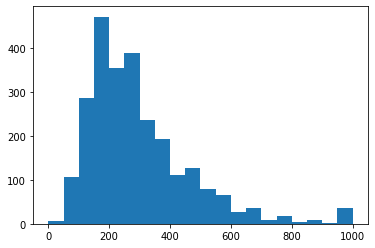

In [99]:
plt.hist(df1['nightly_price'], bins=20, range=(0,1000))

Seems most 2-3 bedrooms with at least 1.5 baths go for around $150-250 a night, so my friends and I will plan for that.

We can also check ratings to see if certain groups get better/worse reviews. Like the "room_type" doesn't seem to affect overall rating too much, but if a host has been desingated as a "super host" or not sure seems to tell the type of experience we'll get!

In [70]:
df1.groupby('room_type').review_scores_rating.mean()

room_type
Entire home/apt    94.84
Private room       95.80
Shared room        95.08
Name: review_scores_rating, dtype: float64

In [71]:
df1.groupby('host_is_superhost').review_scores_rating.mean()

host_is_superhost
False    93.55
True     97.19
Name: review_scores_rating, dtype: float64

And finally if I want to take my cleaned up dataset and save a csv file to do other work on it, or send to someone else I can easily accomplish it as so:

In [72]:
# export to csv
df.to_csv('AirBnB_clean_data.csv')